In [9]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data_path = 'IP_decisions_2/IP_decisions_tucson_noise=0.01_model=1200'
data = pd.read_csv(data_path+'_policy.csv')

print(data.head())

    time  Site Outdoor Air Drybulb Temperature(Environment)  \
0   8.75                                          -6.010972   
1  13.25                                          -2.901945   
2   9.75                                          21.994502   
3  14.25                                           4.294949   
4  17.00                                           4.686087   

   Site Outdoor Air Relative Humidity(Environment)  \
0                                        57.108601   
1                                        82.883238   
2                                        54.508295   
3                                        98.325044   
4                                        67.122941   

   Site Wind Speed(Environment)  \
0                      5.521787   
1                      9.970110   
2                      4.740546   
3                      3.263323   
4                      7.673645   

   Site Direct Solar Radiation Rate per Area(Environment)  \
0                       

Depth:  1 Accuracy:  0.6102571906863491
Depth:  2 Accuracy:  0.6830010652868665
Depth:  3 Accuracy:  0.7034697915081418
Depth:  4 Accuracy:  0.7218079439963476
Depth:  5 Accuracy:  0.7218079439963476
Depth:  6 Accuracy:  0.7225688631867295
Depth:  7 Accuracy:  0.7244711611626845
Depth:  8 Accuracy:  0.7297975954953584
Depth:  9 Accuracy:  0.7365697762897581
Depth:  10 Accuracy:  0.7470704611170293
Depth:  11 Accuracy:  0.7613757418962106
Depth:  12 Accuracy:  0.7813118246842186
Depth:  13 Accuracy:  0.8019327347435702
Depth:  14 Accuracy:  0.8239993912646477
Depth:  15 Accuracy:  0.8495662760614823
Depth:  16 Accuracy:  0.8711002891492924
Depth:  17 Accuracy:  0.8918733830467205
Depth:  18 Accuracy:  0.9115811900776137
Depth:  19 Accuracy:  0.9271800334804444
Depth:  20 Accuracy:  0.9428549688023132
Depth:  21 Accuracy:  0.9539643889818902
Depth:  22 Accuracy:  0.9641607061330086
Depth:  23 Accuracy:  0.9718459899558667
Depth:  24 Accuracy:  0.9787703545883427
Depth:  25 Accuracy:  0.9

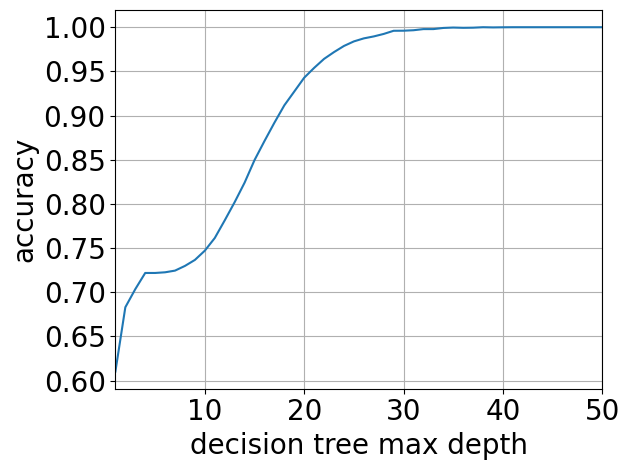

In [10]:
'''
X = data.drop(columns=['action'])
y = data['action']
'''
from sklearn.tree import export_graphviz

X = data.drop(columns=['action'])
y = data['action']

def run_depth_experiment(max_D=50):
    depth = []
    accuracy = []
    for i in range(1, max_D+1):
        # Train decision tree
        clf = DecisionTreeClassifier(max_depth=i)
        clf.fit(X, y)

        # Test decision tree
        y_pred = clf.predict(X)
        acc = accuracy_score(y, y_pred)
        depth.append(i)
        accuracy.append(acc)
        print('Depth: ', i, 'Accuracy: ', acc)
    plt.plot(depth, accuracy)
    font_size = 20
    plt.xlabel('decision tree max depth', fontsize=font_size)
    plt.ylabel('accuracy', fontsize=font_size)
    # x tick font size
    plt.xticks(fontsize=font_size)
    # y tick font size
    plt.yticks(fontsize=font_size)
    plt.xlim(1, max_D)
    plt.grid()
    plt.tight_layout()
    plt.savefig('depth_vs_accuracy.png')
    plt.show()

run_depth_experiment()


In [11]:
# Train decision tree
# clf = DecisionTreeClassifier(max_depth=50)
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Test decision tree
y_pred = clf.predict(X)
print('Accuracy: ', accuracy_score(y, y_pred))

# Plot decision tree
# plt.figure(figsize=(50, 25))
# plot_tree(clf, filled=True)
# plt.savefig('decision_tree.png')
# plt.show()

# print the number of nodes 
print('Number of nodes: ', clf.tree_.node_count)

Accuracy:  1.0
Number of nodes:  6501


In [12]:
# get all leaf nodes
leaf_nodes = clf.apply(X)
print('Leaf nodes: ', leaf_nodes)

Leaf nodes:  [4466 2048 2559 ... 3458 4352 3801]


In [13]:
# print the decision path to the first leaf node
path = clf.decision_path(X)
print('Path: ', path[0])

Path:    (0, 0)	1
  (0, 1446)	1
  (0, 1447)	1
  (0, 4349)	1
  (0, 4350)	1
  (0, 4351)	1
  (0, 4353)	1
  (0, 4427)	1
  (0, 4429)	1
  (0, 4451)	1
  (0, 4452)	1
  (0, 4453)	1
  (0, 4459)	1
  (0, 4463)	1
  (0, 4464)	1
  (0, 4465)	1
  (0, 4466)	1


In [14]:
# print the rules along this path
rules = []
for i in range(len(path[0].indices)-1):
    feature = clf.tree_.feature[path[0].indices[i]]
    threshold = clf.tree_.threshold[path[0].indices[i]]
    if X.columns[feature] == 'action':
        break
    if X.columns[feature] == 'state':
        rules.append('state == '+str(threshold))
    else:
        rules.append('state['+str(X.columns[feature])+'] <= '+str(threshold))

print('Rules: ', rules)

Rules:  ['state[Zone People Occupant Count(SPACE1-1)] <= 0.550000011920929', 'state[time] <= 16.875', 'state[Site Direct Solar Radiation Rate per Area(Environment)] <= 274.1271514892578', 'state[Zone Air Temperature(SPACE1-1)] <= 23.491640090942383', 'state[Site Outdoor Air Drybulb Temperature(Environment)] <= 3.762586832046509', 'state[Zone Air Temperature(SPACE1-1)] <= 20.036446571350098', 'state[Site Wind Speed(Environment)] <= 3.148994207382202', 'state[Zone Air Temperature(SPACE1-1)] <= 20.04244327545166', 'state[Zone Air Temperature(SPACE1-1)] <= 20.63116455078125', 'state[Site Outdoor Air Relative Humidity(Environment)] <= 63.233360290527344', 'state[Site Outdoor Air Relative Humidity(Environment)] <= 63.155242919921875', 'state[Site Outdoor Air Relative Humidity(Environment)] <= 52.03720283508301', 'state[Site Outdoor Air Relative Humidity(Environment)] <= 53.03304862976074', 'state[Site Outdoor Air Drybulb Temperature(Environment)] <= 2.8902745246887207', 'state[Site Outdoor A

In [15]:
# save the decision tree using pickle
import pickle
with open('decision_tree_tucson.pkl', 'wb') as f:
    pickle.dump(clf, f)
